In [5]:
import numpy as np
from pprint import pprint

import os 
from pathlib import Path

dir_path = str(Path(os.getcwd()).parent.absolute())
print(dir_path)

import sys
sys.path.append(dir_path)
if 'dwsimopt.sim_opt' in sys.modules:  # Is the module in the register?
    del sys.modules['dwsimopt.sim_opt']  # If so, remove it.
    del SimulationOptimization
from dwsimopt.sim_opt import SimulationOptimization

c:\Users\lfsfr\Desktop\dwsimopt


In [6]:
# Getting DWSIM path from system path
for k,v in enumerate(os.environ['path'].split(';')):
    if v.find('\DWSIM')>-1:
        path2dwsim = os.path.join(v, '')
if path2dwsim == None:
    path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\"   #insert manuall
print(path2dwsim)

# Loading DWSIM simulation into Python (Simulation object)
sim_smr = SimulationOptimization(dof=np.array([]), path2sim= os.path.join(dir_path, "examples\\SMR_LNG\\SMR.dwxmz"), 
                     path2dwsim = path2dwsim)
sim_smr.savepath = os.path.join(dir_path, "examples\\SMR_LNG\\SMR2.dwxmz")
sim_smr.add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim_smr.connect(interf)

C:\Users\lfsfr\AppData\Local\DWSIM7\
added refs
Simulation was loaded successfully


In [7]:
from dwsimopt.py2dwsim import * 

# Assign DoF:
create_pddx( ["MR-1", "CompoundMassFlow", "Nitrogen", "kg/s"],    sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Methane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Ethane", "kg/s"],      sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Propane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Isopentane", "Pa"],    sim_smr, element="dof" )
create_pddx( ["VALV-01", "OutletPressure", "Mixture", "Pa"],      sim_smr, element="dof" )
create_pddx( ["COMP-1", "OutletPressure", "Mixture", "Pa"],       sim_smr, element="dof" )
create_pddx( ["COOL-08", "OutletTemperature", "Mixture", "K"],    sim_smr, element="dof" )

# Assign F
create_pddx( ["Sum_W", "EnergyFlow", "Mixture", "kW"], sim_smr, element="fobj" )

# adding constraints (g_i <= 0):
g1 = create_pddx( ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g1[0]() , ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )
g2 = create_pddx( ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g2[0]() , ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )


pprint(vars(sim_smr))

{'dof': array([[<function toDwsim.<locals>.<lambda> at 0x000002CC2FB130D0>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13550>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13AF0>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13B80>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13C10>,
        'MR-1', 'CompoundMassFlow', 'Isopentane', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13CA0>,
        'VALV-01', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13D30>,
        'COMP-1', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13DC0>,
        'COOL-08', 'OutletTemperature', 'Mixture', 'K']], 

In [8]:
# Initial simulation optimization setup
# Initial guess of optimization
x0 = np.array( [0.25/3600, 0.70/3600, 1.0/3600, 1.10/3600, 1.80/3600, 2.50e5, 50.00e5, -60+273.15] )

# # Testing for simulation at x0
# sim_smr.calculate_optProblem(1.0*x0)
# print(sim_smr.x_val,
#       sim_smr.f_val,
#       sim_smr.g_val)

# # Test saving simulation at x0 in 'savepath'
# sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

# Inspecting simulation object
pprint(vars(sim_smr))

{'dof': array([[<function toDwsim.<locals>.<lambda> at 0x000002CC2FB130D0>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13550>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13AF0>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13B80>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13C10>,
        'MR-1', 'CompoundMassFlow', 'Isopentane', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13CA0>,
        'VALV-01', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13D30>,
        'COMP-1', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002CC2FB13DC0>,
        'COOL-08', 'OutletTemperature', 'Mixture', 'K']], 

In [9]:
# Setup for optimization
# convergence tolerances
xtol=0.01
ftol=0.01
maxiter=5 # +- 20 seconds per iteration

# decision variables bounds
bounds_raw = np.array( [0.5*np.asarray(x0), 1.5*np.asarray(x0)] )   # 50 % around base case
bounds_raw[0][-1] = 153     # precool temperature low limit manually
bounds_raw[1][-1] = 253     # precool temperature upper limit manually

# regularizer calculation
regularizer = np.zeros(x0.size)
import math
for i in range(len(regularizer)):
    regularizer[i] = 10**(-1*math.floor(math.log(x0[i],10))) # regularizer for magnitude order of 1e0

# bounds regularized
bounds_reg = regularizer*bounds_raw
# bounds = optimize.Bounds(bounds_reg[0], bounds_reg[1])

# objective and constraints lambda definitions
f = lambda x: sim_smr.calculate_optProblem(np.asarray(x)/regularizer)[0:sim_smr.n_f]
g = lambda x: sim_smr.calculate_optProblem(np.asarray(x)/regularizer)[sim_smr.n_f:(sim_smr.n_f+sim_smr.n_g)]
# nonlinear_constraint = optimize.NonlinearConstraint(g, -np.inf, 0, jac='2-point', hess=optimize.BFGS())

In [10]:
# bb is not working b/c of lambda function that cannot be pickled

# import black_box as bb
# import dill as pickle

# def f_pen(x):
#     return sim_smr.fpen_barrier(x/regularizer)
# print("===============TESTING f_pen================")
# f_pen(x0*regularizer)

# print("==============BB OPTIMIZATION===============")
# result = bb.search_min(f=sim_smr.fpen_barrier, 
#                         domain = bounds_reg.T,
#                         budget = 20,  # total number of function calls available
#                         batch = 1,  # number of calls that will be evaluated in parallel
#                         resfile = 'output.csv')  # text file where results will be savedin a single iteration.

# pprint(result)

## Data generation for Surrogate Modeling

In [57]:
# Setup Data
n_train = 400
n_test = 100

# Design of experiments using pyDOE.lhs
print(f"Bounds: {bounds_reg}")
from pyDOE import lhs
X_train = np.array( bounds_reg[1] - bounds_reg[0] )*lhs( sim_smr.n_dof, samples=n_train, criterion="maximin", iterations=100 )+ bounds_reg[0]
X_test = np.array( bounds_reg[1] - bounds_reg[0] )*np.random.rand( n_test, sim_smr.n_dof ) + bounds_reg[0]
Y_train = np.zeros( (n_train, sim_smr.n_f + sim_smr.n_g) )
Y_test = np.zeros( (n_test, sim_smr.n_f + sim_smr.n_g) )

Bounds: [[ 3.47222222  0.97222222  1.38888889  1.52777778  2.5         1.25
   2.5         1.53      ]
 [10.41666667  2.91666667  4.16666667  4.58333333  7.5         3.75
   7.5         2.53      ]]


In [58]:
# Data acquisition
for i, x_ite in enumerate(X_train):
    Y_train[i] = sim_smr.calculate_optProblem(x_ite/regularizer)
for i, x_ite in enumerate(X_test):
    Y_test[i] = sim_smr.calculate_optProblem(x_ite/regularizer)

opt_functions calculation at x = [7.43971458e-05 2.36966140e-04 1.54690525e-04 4.11292795e-04
 3.99472948e-04 1.94605452e+05 7.30332117e+06 1.75669665e+02]
f = [0.40065294], g = [ 4.84424974 -1.31133203] at x = [7.43971458e-05 2.36966140e-04 1.54690525e-04 4.11292795e-04
 3.99472948e-04 1.94605452e+05 7.30332117e+06 1.75669665e+02]
opt_functions calculation at x = [5.02978105e-05 1.20000106e-04 3.98333771e-04 3.50979359e-04
 3.36649139e-04 1.99018126e+05 3.09588420e+06 2.03413531e+02]
f = [0.36335029], g = [-2.63054495 -0.02967003] at x = [5.02978105e-05 1.20000106e-04 3.98333771e-04 3.50979359e-04
 3.36649139e-04 1.99018126e+05 3.09588420e+06 2.03413531e+02]
opt_functions calculation at x = [6.12364596e-05 1.22661971e-04 1.76280072e-04 3.63851346e-04
 7.03854853e-04 2.70691651e+05 7.32893492e+06 2.16802056e+02]
f = [0.29919097], g = [13.10715014 11.74531087] at x = [6.12364596e-05 1.22661971e-04 1.76280072e-04 3.63851346e-04
 7.03854853e-04 2.70691651e+05 7.32893492e+06 2.16802056e+02

In [59]:
for i, x_ite in enumerate(X_test):
    Y_test[i] = sim_smr.calculate_optProblem(x_ite/regularizer)

opt_functions calculation at x = [5.13994482e-05 1.99143365e-04 4.03867854e-04 1.90071208e-04
 4.57514216e-04 2.54779511e+05 5.69862158e+06 2.31718743e+02]
f = [0.40852044], g = [ 4.43109213 -0.52761552] at x = [5.13994482e-05 1.99143365e-04 4.03867854e-04 1.90071208e-04
 4.57514216e-04 2.54779511e+05 5.69862158e+06 2.31718743e+02]
opt_functions calculation at x = [6.09363527e-05 1.61268864e-04 2.04237508e-04 2.11725784e-04
 4.83550771e-04 1.81660667e+05 2.70537715e+06 2.24622324e+02]
f = [0.31453734], g = [8.53568258 2.70083031] at x = [6.09363527e-05 1.61268864e-04 2.04237508e-04 2.11725784e-04
 4.83550771e-04 1.81660667e+05 2.70537715e+06 2.24622324e+02]
opt_functions calculation at x = [7.81321153e-05 1.84904558e-04 2.27208122e-04 3.47814130e-04
 2.73540928e-04 1.42985638e+05 6.25037568e+06 1.63085811e+02]
f = [0.37234494], g = [26.69426608 -3.12378328] at x = [7.81321153e-05 1.84904558e-04 2.27208122e-04 3.47814130e-04
 2.73540928e-04 1.42985638e+05 6.25037568e+06 1.63085811e+02]


In [60]:
# Simple data analysis
for i in range(len(Y_train[0,:])):
    print(f"========== y_i={i} ===========")
    print(f"Mean============== Std================ Min==================== Max")
    print( np.mean(Y_train[:,i]), np.std(Y_train[:,i]), np.min(Y_train[:,i]), np.max(Y_train[:,i]) )
    print( np.mean(Y_test[:,i]), np.std(Y_test[:,i]), np.min(Y_test[:,i]), np.max(Y_test[:,i]) )

========== y_i=0 ===========
Mean============== Std================ Min==================== Max
0.38700531380035863 0.0605477498175754 0.2527936833959203 0.5398191151160806
0.3796311575704819 0.05431365944978647 0.257570811440421 0.5209477767704749
========== y_i=1 ===========
Mean============== Std================ Min==================== Max
7.895562521974062 13.280176560930016 -12.977222318350982 53.149455202837316
8.51383028839214 12.488451809000313 -7.748893241470483 49.551820111197
========== y_i=2 ===========
Mean============== Std================ Min==================== Max
-0.10435511636288436 4.806149070615685 -6.131566795066675 27.519632937692734
0.11810256972370724 5.103102406965769 -5.887926626957835 20.275673919475025


Text(0, 0.5, 'Y_test_pred')

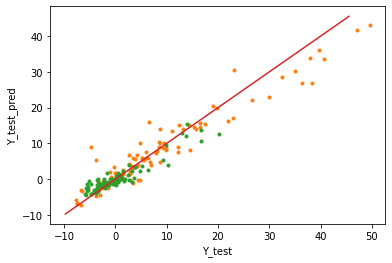

In [61]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

i_pos = 0

# creating and training Random Forest model
m = RandomForestRegressor()
m.fit(X_train, Y_train)
Y_test_pred = m.predict(X_test)
# plotando valores verdadeiros contra predições
plt.plot(Y_test, Y_test_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')

Text(0, 0.5, 'Y_test_pred')

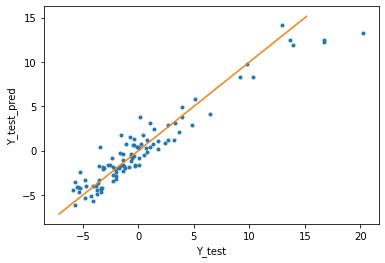

In [66]:
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

i_pos = 2

# creating and training Random Forest model
kernel = 1.0 * Matern(1., (1e-3, 1e2), nu=1.5)
m_gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
# m_gpr = GaussianProcessRegressor(kernel=RBF())
m_gpr.fit(X_train, Y_train[:,i_pos])
Y_test_pred = m_gpr.predict(X_test)
# plotando valores verdadeiros contra predições
plt.plot(Y_test[:,i_pos], Y_test_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
r2 = r2_score(Y_test[:,i_pos], Y_test_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')

MAE: 1.1735949454790204
R2: 0.9034969186063847


In [105]:
import datetime
import shutil

datetime.datetime.now()
now = str(datetime.datetime.now())
now = now.replace(' ','_')
now=now.split('.')[0]
now=now.replace(':','-')
os.mkdir('./data/'+now)
np.savetxt('./data/'+now+'/X_train.csv', X_train, delimiter=",")
np.savetxt('./data/'+now+'/X_test.csv', X_test, delimiter=",")
np.savetxt('./data/'+now+'/Y_train.csv', Y_train, delimiter=",")
np.savetxt('./data/'+now+'/Y_test.csv', Y_test, delimiter=",")
with open('./data/'+now+'/sim.txt', 'w') as f:
    print(vars(sim_smr), file=f)
shutil.copyfile( sim_smr.path2sim, './data/'+now+'/sim.dwxmz' )